In [1]:
from scripts.halo_analysis_scripts import *
%matplotlib inline

palettable colormaps are not installed
don't have phil's colormaps


In [75]:
def plot_mass_fraction(particle_types_num=[0], flabel='gas', ylim=(-2.0,1.0), legendFlag=True, particle_types=[0,1,2,4,5], zbinwidth = 0.5, rbins=np.power(10, np.arange(np.log10(0.005258639741921723), np.log10(3), 0.05))):
    rmid = (rbins[:-1]+rbins[1:])/2 #in units of Rvir
    
    fig, axes = plt.subplots(1, 5, sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.03}, figsize=[4.8*5,4.8*1], dpi=150, facecolor='w')
    cmaps = {'h206':plt.cm.Blues, 'h29':plt.cm.Greens, 'h113':plt.cm.Reds, 'h2':plt.cm.Purples}
    indices = {'h206':0, 'h29':1, 'h113':2, 'h2':3}

    for halo, snapdir in Quest_sims['nofb'].items():
        cmap = cmaps[halo]
        simname = os.path.basename(snapdir)
        allprofiles = h5todict(f'data/{simname}_allprofiles_widezbins.h5')

        cosmological_baryon_budget = read_param_file(snapdir)['OmegaBaryon']/read_param_file(snapdir)['Omega0']

        for z0, c in zip( sorted(allprofiles.keys()), cmap(np.linspace(0.1,1,len(allprofiles.keys())))[::-1] ):
            fbarr = []
            for k in allprofiles[z0].keys():
                totmass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types], axis=0 )
                nummass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types_num], axis=0 )
                with np.errstate(all='ignore'): fb = np.cumsum(nummass)/np.cumsum(totmass)/cosmological_baryon_budget
                fbarr.append(fb)
            z0n = float(z0.split('z0_')[1])
            axes[indices[halo]+1].plot(np.log10(allprofiles[z0][k]['rmid']), np.log10(np.median(fbarr, axis=0)), c=c, label=f'z=[{z0n},{z0n+zbinwidth})')
            axes[0].plot(np.log10(rmid), np.log10(np.median(fbarr, axis=0)), c=c)
            assert np.array_equal(allprofiles[z0][k]['rmid'], rmid)

        if legendFlag: axes[indices[halo]+1].legend(loc=4)
        axes[indices[halo]+1].set_title(simname)

    for ax in axes: ax.axhline(0, ls='--', c='k', zorder=-1)
    for ax in axes: ax.set_xlabel(r'$\log (r/R_{vir})$')
    axes[0].set_ylabel(f'$\log f_{{{flabel}}}/(\Omega_b / \Omega_m)$')
    axes[0].set_ylim(ylim)

/tmp/ipykernel_21682/431126959.py:23: RuntimeWarning: divide by zero encountered in log10
  axes[indices[halo]+1].plot(np.log10(allprofiles[z0][k]['rmid']), np.log10(np.median(fbarr, axis=0)), c=c, label=f'z=[{z0n},{z0n+zbinwidth})')
/tmp/ipykernel_21682/431126959.py:24: RuntimeWarning: divide by zero encountered in log10
  axes[0].plot(np.log10(rmid), np.log10(np.median(fbarr, axis=0)), c=c)


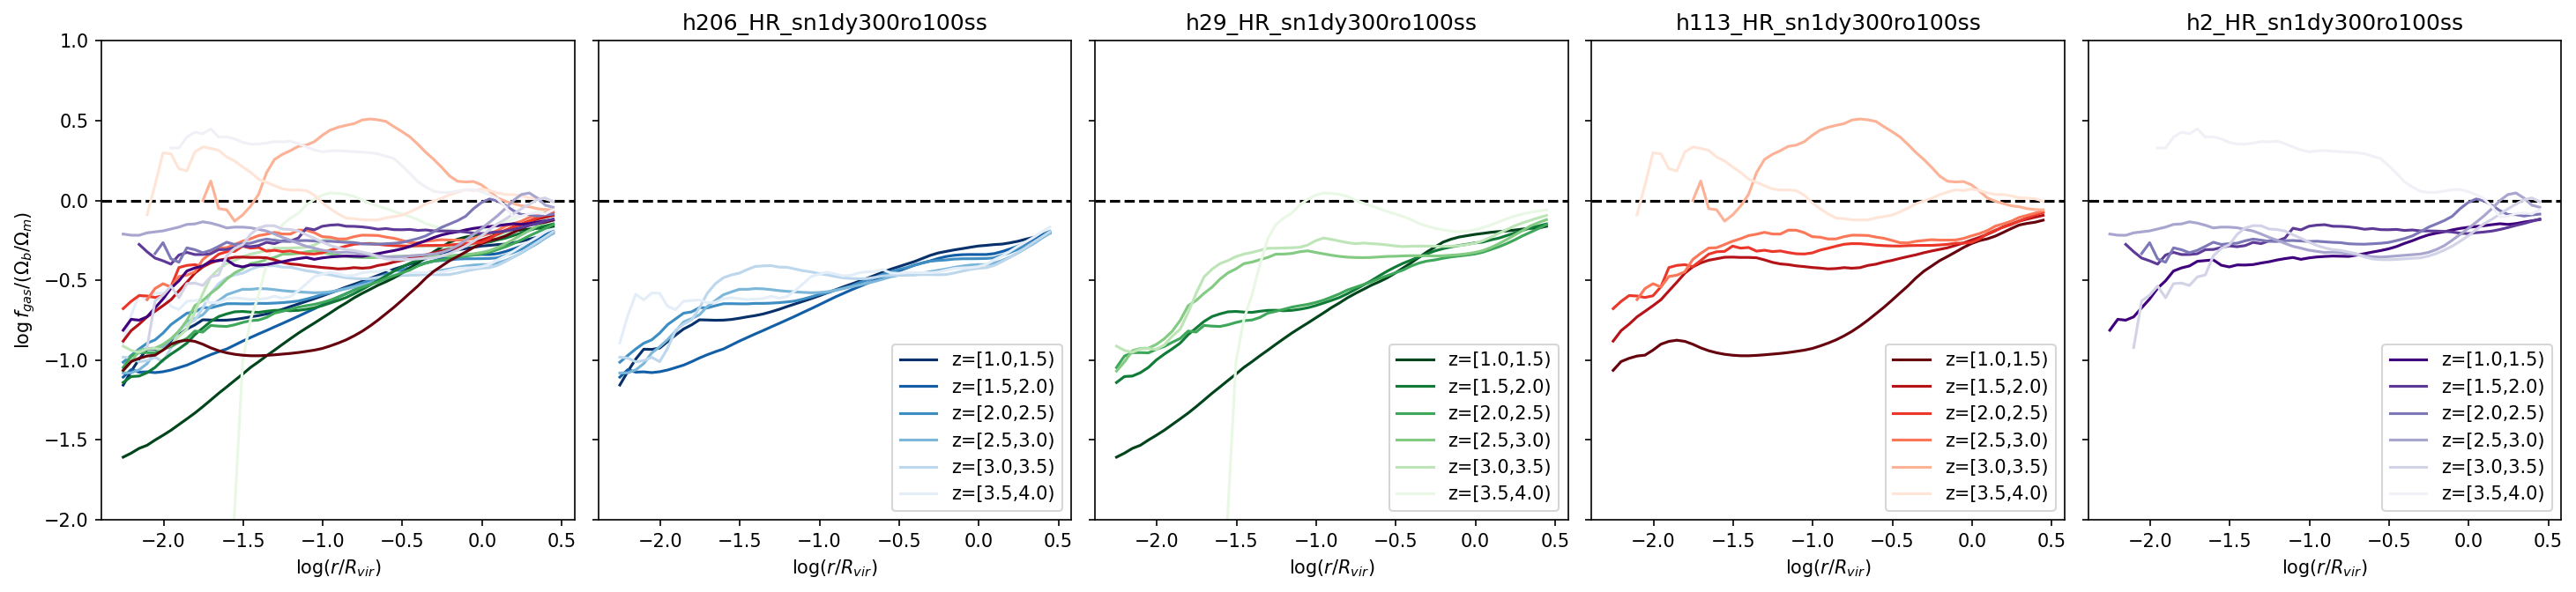

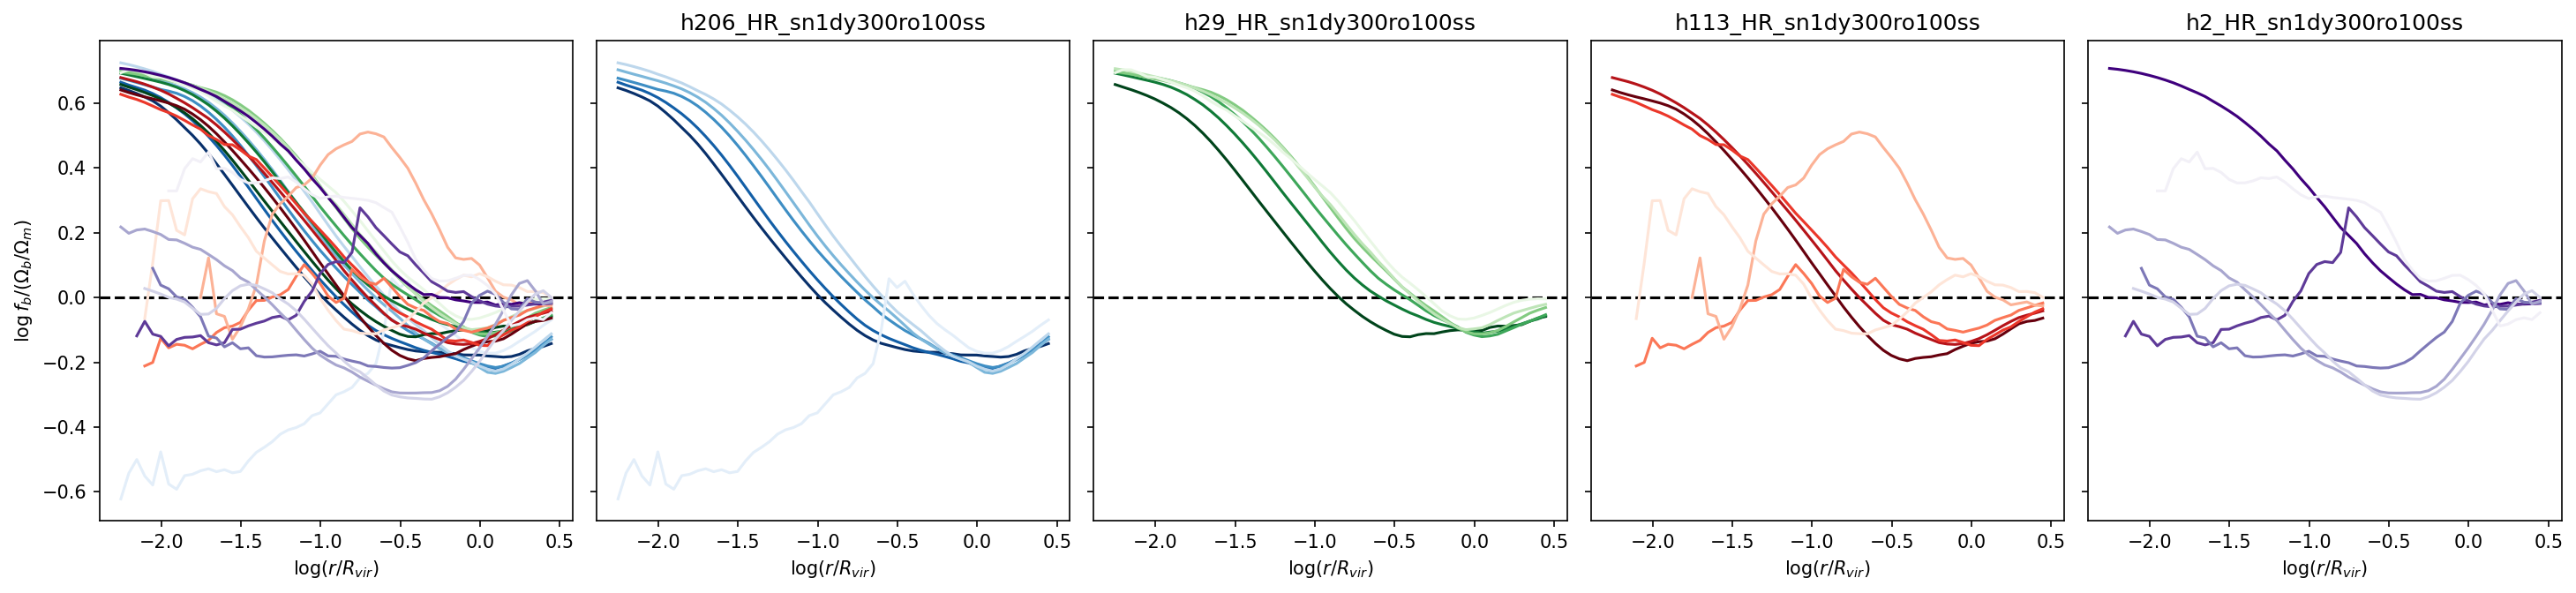

In [76]:
plot_mass_fraction()
plot_mass_fraction([0,4], 'b', None, False)

In [2]:
halos = sorted([f.split('_allprofiles_widezbins.h5')[0] for f in os.listdir('data') if 'allprofiles_widezbins.h5' in f])

Text(0, 0.5, '$\\log f_{b}/(\\Omega_b / \\Omega_m)$')

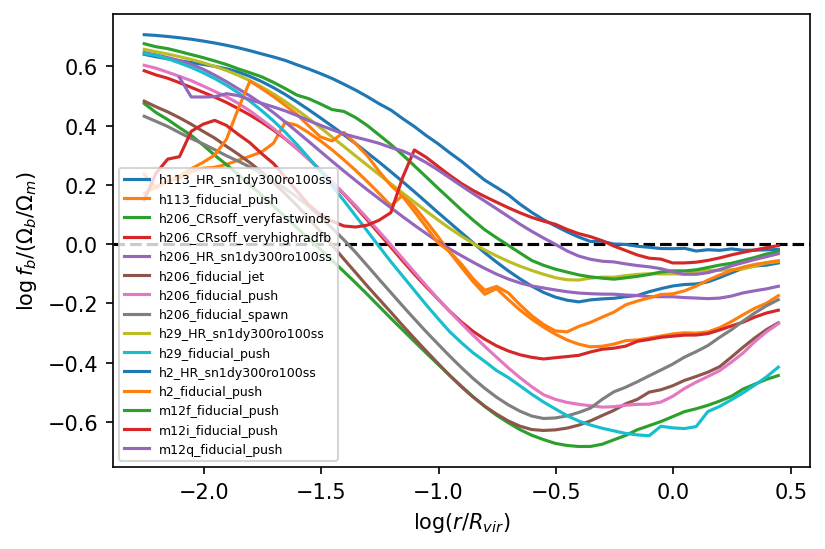

In [3]:
z0 = 'z0_1.0'
particle_types_num=[0,4]
particle_types=[0,1,2,4,5]
flabel = 'b'

plt.figure(dpi=150)
for halo in halos:
    allprofiles = h5todict(f'data/{halo}_allprofiles_widezbins.h5')
    snapdir = f'/projects/b1026/isultan/halos/{halo}'
    if not os.path.isdir(snapdir):
        snapdir = Quest_sims['nofb'][halo.split('_')[0]]
    cosmological_baryon_budget = read_param_file(snapdir)['OmegaBaryon']/read_param_file(snapdir)['Omega0']

    fbarr = []
    for k in allprofiles[z0].keys():
        totmass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types], axis=0 )
        nummass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types_num], axis=0 )
        with np.errstate(all='ignore'): fb = np.cumsum(nummass)/np.cumsum(totmass)/cosmological_baryon_budget
        fbarr.append(fb)
    plt.plot(np.log10(allprofiles[z0][k]['rmid']), np.log10(np.median(fbarr, axis=0)), label=f'{halo}')
plt.legend(prop={'size': 6})
plt.axhline(0, ls='--', c='k', zorder=-1)
plt.xlabel(r'$\log (r/R_{vir})$')
plt.ylabel(f'$\log f_{{{flabel}}}/(\Omega_b / \Omega_m)$')

In [4]:
allprofiles[z0][k]['rmid'][39], allprofiles[z0][k]['rmid'][45], allprofiles[z0][k]['rmid'][51], allprofiles[z0][k]['rmid'][54]

(0.49727036726083473,
 0.9921848241462757,
 1.979668989103084,
 2.7963567730334766)

Text(0, 0.5, '$\\log f_{b}/(\\Omega_b / \\Omega_m)$')

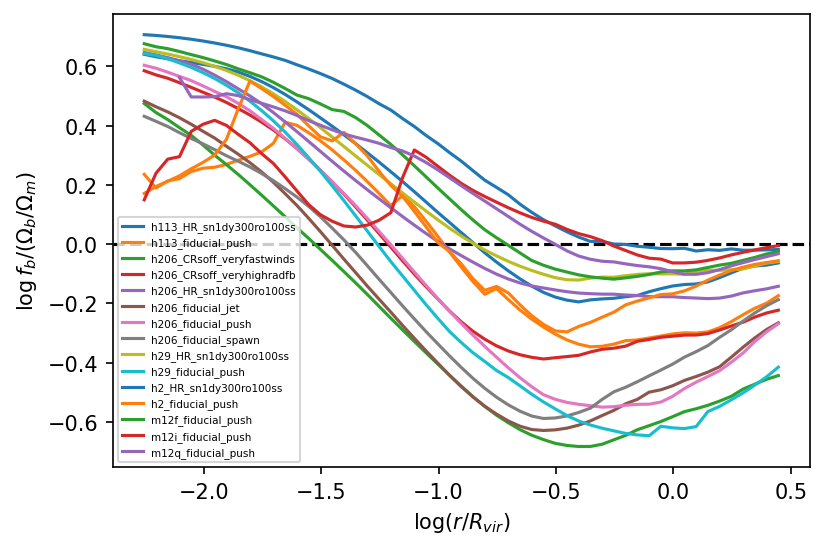

In [5]:
z0 = 'z0_1.0'
particle_types_num=[0,4]
particle_types=[0,1,2,4,5]
flabel = 'b'

fb_05 = []
fb_1 = []
fb_2 = []
fb_3 = []

plt.figure(dpi=150)
for halo in halos:
    allprofiles = h5todict(f'data/{halo}_allprofiles_widezbins.h5')
    snapdir = f'/projects/b1026/isultan/halos/{halo}'
    if not os.path.isdir(snapdir):
        snapdir = Quest_sims['nofb'][halo.split('_')[0]]
    cosmological_baryon_budget = read_param_file(snapdir)['OmegaBaryon']/read_param_file(snapdir)['Omega0']

    fbarr = []
    for k in allprofiles[z0].keys():
        totmass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types], axis=0 )
        nummass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types_num], axis=0 )
        with np.errstate(all='ignore'): fb = np.cumsum(nummass)/np.cumsum(totmass)/cosmological_baryon_budget
        fbarr.append(fb)
    fbarr = np.median(fbarr, axis=0)
    plt.plot(np.log10(allprofiles[z0][k]['rmid']), np.log10(fbarr), label=f'{halo}')
    fb_05.append(fbarr[39])
    fb_1.append(fbarr[45])
    fb_2.append(fbarr[51])
    fb_3.append(fbarr[54])
plt.legend(prop={'size': 5})
plt.axhline(0, ls='--', c='k', zorder=-1)
plt.xlabel(r'$\log (r/R_{vir})$')
plt.ylabel(f'$\log f_{{{flabel}}}/(\Omega_b / \Omega_m)$')

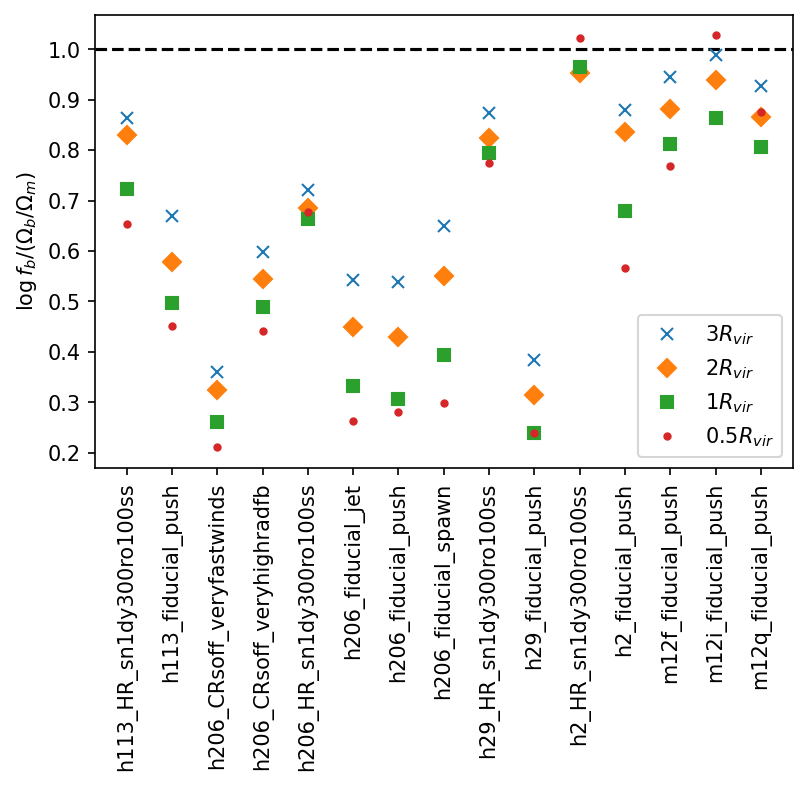

In [8]:
plt.figure(dpi=150)

plt.plot(fb_3, 'x', label='$3 R_{vir}$')
plt.plot(fb_2, 'D', label='$2 R_{vir}$')
plt.plot(fb_1, 's', label='$1 R_{vir}$')
plt.plot(fb_05, '.', label='$0.5 R_{vir}$')

plt.xticks(range(len(halos)), halos, rotation=90)
plt.axhline(1, ls='--', c='k', zorder=-1)
plt.ylabel(f'$\log f_{{{flabel}}}/(\Omega_b / \Omega_m)$')
plt.legend()